<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/Regression-with-a-Crab-Age-/blob/main/Regression_with_a_Crab_Age_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install opendatasets --quiet

In [2]:
import opendatasets as od

In [15]:
download1=od.download('https://www.kaggle.com/datasets/sidhus/crab-age-prediction')
download2=od.download('https://www.kaggle.com/competitions/playground-series-s3e16/data?select=sample_submission.csv')

Skipping, found downloaded files in "./crab-age-prediction" (use force=True to force download)
Skipping, found downloaded files in "./playground-series-s3e16" (use force=True to force download)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train=pd.read_csv("/content/playground-series-s3e16/train.csv")
test=pd.read_csv("/content/playground-series-s3e16/test.csv")
original=pd.read_csv("/content/crab-age-prediction/CrabAgePrediction.csv")
submission=pd.read_csv("/content/playground-series-s3e16/sample_submission.csv")

In [18]:
print("Shape of train set",train.shape)
print("Shape of test set",test.shape)
print("Shape of originat set",original.shape)
print("Shape of submission set",submission.shape)

Shape of train set (74051, 10)
Shape of test set (49368, 9)
Shape of originat set (3893, 9)
Shape of submission set (49368, 2)


In [19]:
def data_info(data,title):
  col=data.columns.to_list()
  display(data[col].head(),f'{title}: First 5 rows')
  display(data[col].describe(),f'{title}: Summary')
  display(data[col].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column')
  display(data[col].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan')

In [20]:
data_info(train,"Train data")
print('-'*100)
data_info(test,"Test data")
print('-'*100)
data_info(original,"original data")

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


'Train data: First 5 rows'

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


'Train data: Summary'

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Unique Value Count,74051,3,144,122,65,3096,1766,967,1048,28


'Train data: Unique Value Counts In Each Column'

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,0,0,0,0,0,0,0,0,0


'Train data:Columns With Nan'

----------------------------------------------------------------------------------------------------


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


'Test data: First 5 rows'

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


'Test data: Summary'

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
Unique Value Count,49368,3,140,122,57,2948,1692,938,987


'Test data: Unique Value Counts In Each Column'

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,0,0,0,0,0,0,0,0


'Test data:Columns With Nan'

----------------------------------------------------------------------------------------------------


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


'original data: First 5 rows'

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


'original data: Summary'

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Unique Value Count,3,134,111,51,2343,1482,867,907,28


'original data: Unique Value Counts In Each Column'

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,0,0,0,0,0,0,0,0


'original data:Columns With Nan'

# Data Exploration

In [21]:
target_col='Age'


In [25]:
train=train.drop(columns=['id'],axis=1)
test=test.drop(columns=['id'],axis=1)

In [26]:
num_col=test.select_dtypes(include=['float64']).columns.tolist()
cat_col=test.select_dtypes(include=['object']).columns.tolist()

Text(0.5, 1.0, 'Original Dataset')

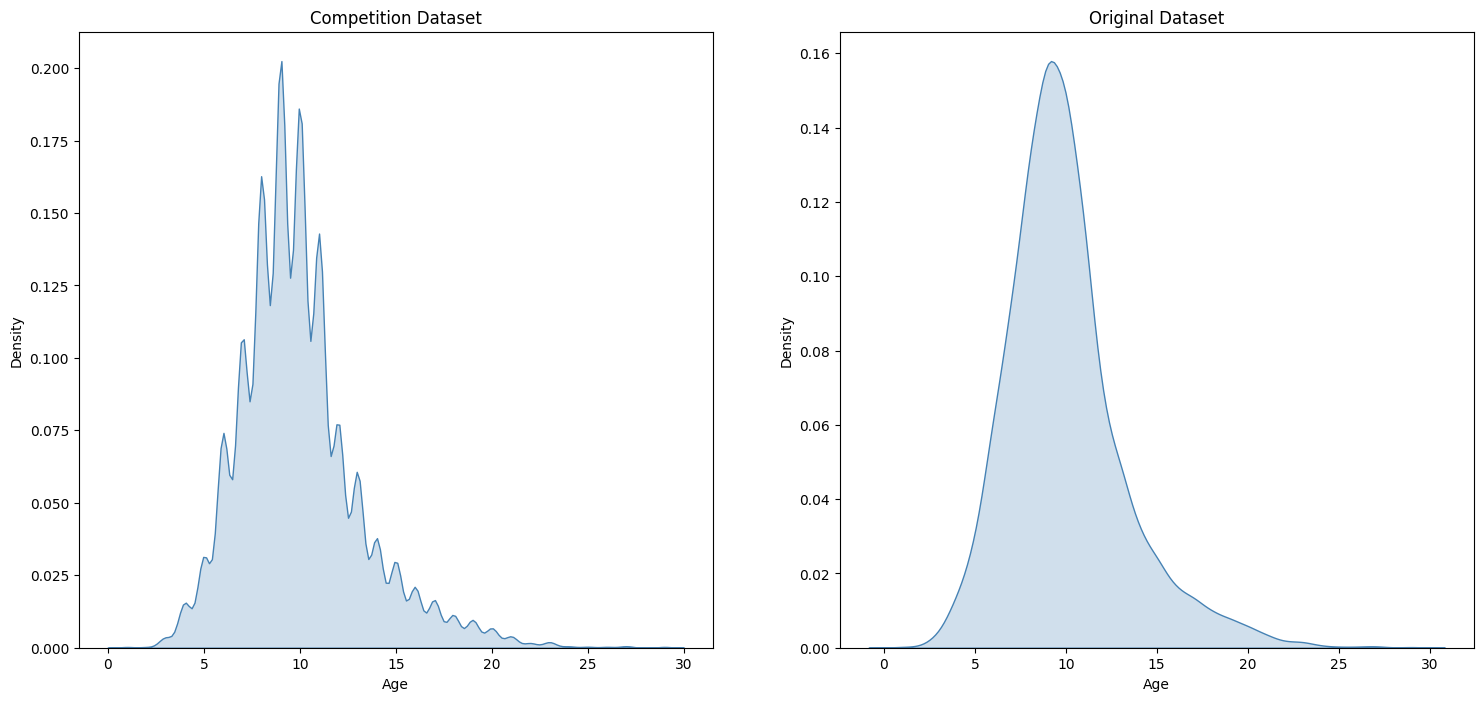

In [27]:
fig,axes=plt.subplots(1,2,figsize=(18,8))
sns.kdeplot(ax=axes[0],data=train,x='Age',fill=True,color='steelblue').set_title('Competition Dataset')
sns.kdeplot(ax=axes[1],data=original,x='Age',fill=True,color='steelblue').set_title('Original Dataset')

In [30]:
def plot_heatmap(data,title):
  # Create a mask for diagonal elements
  mask=np.zeros_like(data.astype(float).corr())
  mask[np.triu_indices_from(mask)]=True

  
  #Set colormap
  cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
  plt.figure(figsize=(15,15))
  #Set title
  plt.title(f'{title} Correlation',fontweight='bold',y=1.02,size=20)

  #Plot heatmap
  sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,vmin=-1.0,square=True,
              cmap=cmap,linecolor='white',annot=True,annot_kws={"size":14,"weight":"bold"},
              mask=mask)

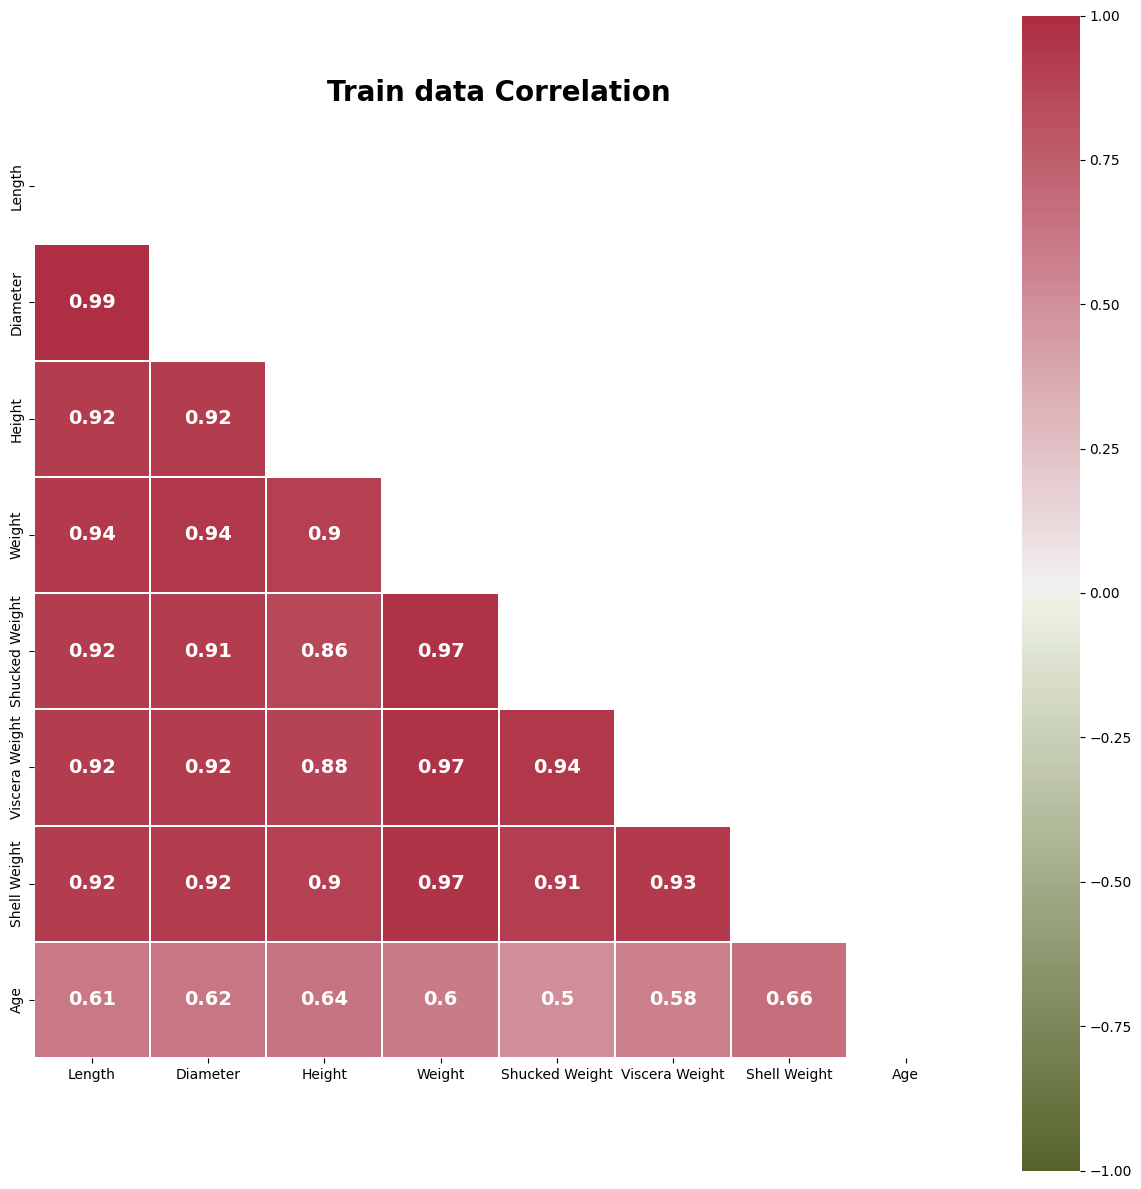

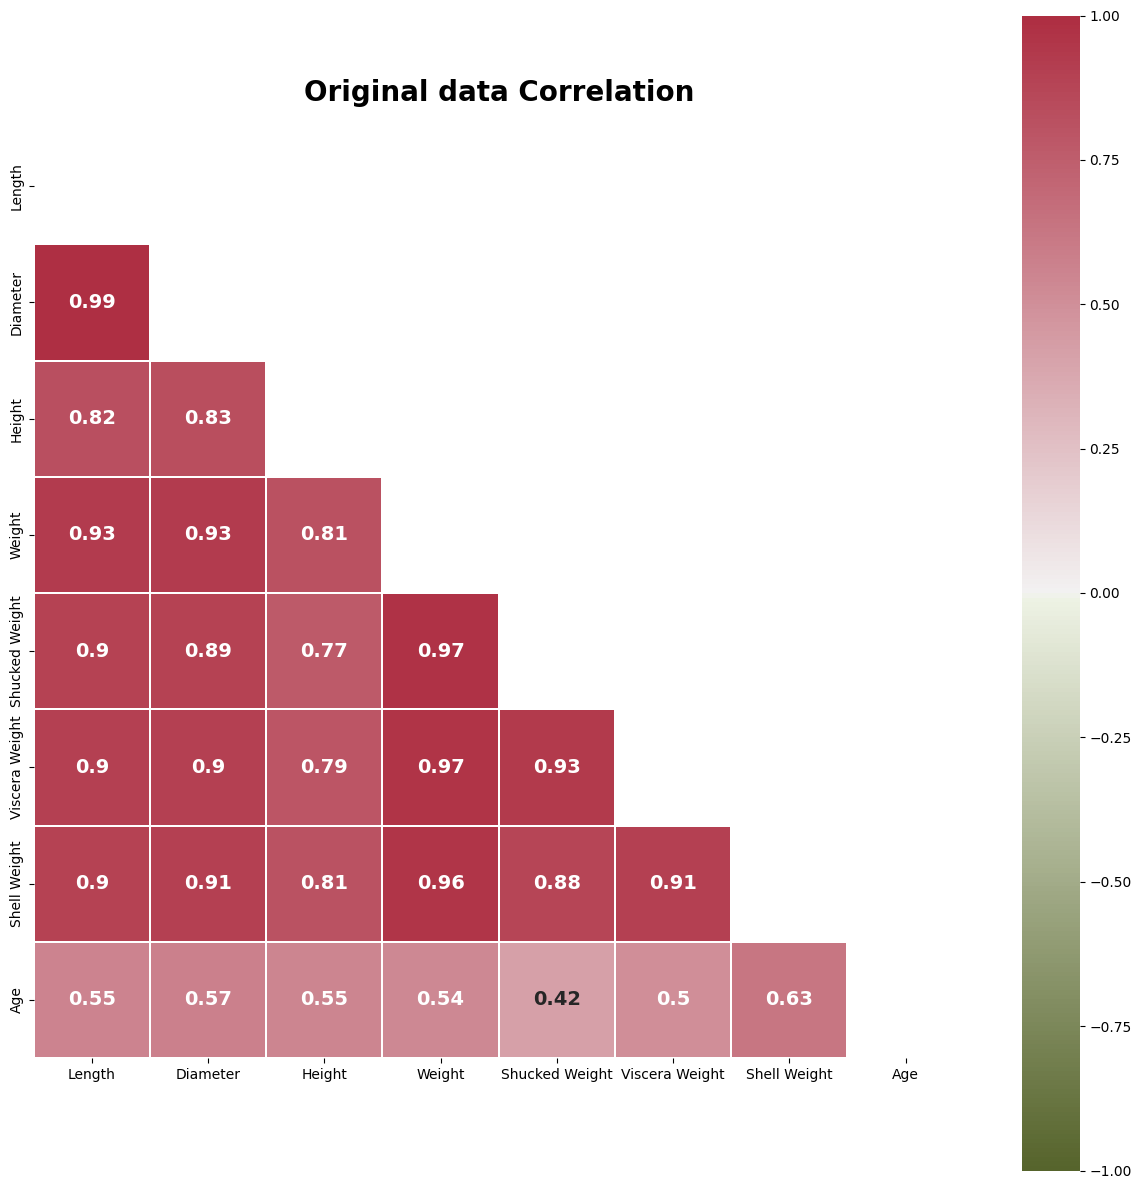

In [31]:
plot_heatmap(train[num_col+[target_col]],title="Train data")
plot_heatmap(original[num_col+[target_col]],title="Original data")


In [31]:
def plot_pie(train,target_col,figsize=(16,5))